In [1]:
### Carregar banco de dados de monitoramento dos paramentros da fermentação.

import sqlite3
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 

from datetime import datetime

connect_registros = sqlite3.connect('../registro.db')

In [2]:
def excel_date(date1):
    temp = datetime(1899, 12, 30)    # Note, not 31st Dec but 30th!
    delta = date1 - temp
    index = 0
    for row in delta:
        delta.iloc[index] = float(delta.iloc[index].days) + float(delta.iloc[index].seconds / 86400)
        index  = index + 1
    return delta

In [3]:
# Lendo tabela medidas do banco de dados 'registro.db'
cursor = connect_registros.cursor()
cursor.execute("""SELECT * FROM medidas;""")
register = pd.DataFrame(cursor.fetchall(), columns =['id', 'temperatura', 'UR', 'reator_CO2_1', 'reator_CO2_2', 'data_registro'])
register.loc[:, 'data_registro'] = pd.to_datetime(register.data_registro, format="%Y-%m-%d %H:%M:%S")

In [4]:
# Fechando conecção com banco de dados
connect_registros.close()

In [5]:
register_reator_1 = register.drop(['id','temperatura','UR','reator_CO2_2'], axis=1)
register_reator_2 = register.drop(['id','temperatura','UR','reator_CO2_1'], axis=1)

In [6]:
print(register_reator_1.head())
print(register_reator_2.head())

   reator_CO2_1              data_registro
0           300 2019-12-11 15:39:52.097310
1           300 2019-12-11 15:40:02.291036
2           300 2019-12-11 15:40:12.407844
3           300 2019-12-11 15:40:22.555598
4           300 2019-12-11 15:40:32.750946
   reator_CO2_2              data_registro
0           600 2019-12-11 15:39:52.097310
1           600 2019-12-11 15:40:02.291036
2           600 2019-12-11 15:40:12.407844
3           600 2019-12-11 15:40:22.555598
4           600 2019-12-11 15:40:32.750946


In [7]:
index_temp = 0
value_temp = 0
register_reator_1_filter = []
tratamento = 0
escala = 0.00001

for index, row in register_reator_1.iterrows():
    if value_temp != row['reator_CO2_1']:
        register_reator_1_filter.append([row['reator_CO2_1'], row['data_registro']])
    value_temp = row['reator_CO2_1']

for index in range(len(register_reator_1_filter)-1):
    if register_reator_1_filter[index+1][0] != 0:
        delta_volume = register_reator_1_filter[index+1][0] - register_reator_1_filter[index][0]
        delta_time = register_reator_1_filter[index+1][1] - register_reator_1_filter[index][1]
        dv = delta_volume / delta_time.total_seconds()
        if(dv > escala):
            register_reator_1_filter[index].extend([dv])
        else:
            register_reator_1_filter[index].extend([0])
    else:
        register_reator_1_filter[index].extend([0])

register_reator_1_filter[len(register_reator_1_filter)-1].extend([0])

for index in range(len(register_reator_1_filter)-2):
    if register_reator_1_filter[index+1][0] != 0:
        delta_volume = register_reator_1_filter[index+1][2] - register_reator_1_filter[index][2]
        delta_time = register_reator_1_filter[index+1][1] - register_reator_1_filter[index][1]
        dv = delta_volume / delta_time.total_seconds()
        if(dv > escala):
            register_reator_1_filter[index].extend([dv])
        else:
            register_reator_1_filter[index].extend([0])
    else:
        register_reator_1_filter[index].extend([0])

register_reator_1_filter[len(register_reator_1_filter)-1].extend([0])


for index in range(len(register_reator_1_filter)-1):
    if (register_reator_1_filter[index][0] <= 1):
        tratamento = tratamento + 1
    register_reator_1_filter[index].extend([tratamento])

register_reator_1 = pd.DataFrame(register_reator_1_filter, columns =['reator_CO2_1', 'data_registro','derivada_1', 'derivada_2', 'tratamento'])
register_reator_1.head()

,reator_CO2_1,data_registro,derivada_1,derivada_2,tratamento
0,300,2019-12-11 15:39:52.097310,0.298786,0.004558,0.0
1,500,2019-12-11 15:51:01.472474,3.349743,0.444550,0.0
2,600,2019-12-11 15:51:31.325507,16.620898,0.000000,0.0
3,700,2019-12-11 15:51:37.342029,13.817189,1.047765,0.0
4,800,2019-12-11 15:51:44.579391,21.400244,1.222147,0.0


In [8]:
index_temp = 0
value_temp = 0
register_reator_2_filter = []
tratamento = 0
escala = 0.00001

for index, row in register_reator_2.iterrows():
    if value_temp != row['reator_CO2_2']:
        register_reator_2_filter.append([row['reator_CO2_2'], row['data_registro']])
    value_temp = row['reator_CO2_2']

for index in range(len(register_reator_2_filter)-1):
    if register_reator_2_filter[index+1][0] != 0:
        delta_volume = register_reator_2_filter[index+1][0] - register_reator_2_filter[index][0]
        delta_time = register_reator_2_filter[index+1][1] - register_reator_2_filter[index][1]
        dv = delta_volume / delta_time.total_seconds()
        if(dv > escala):
            register_reator_2_filter[index].extend([dv])
        else:
            register_reator_2_filter[index].extend([0])
    else:
        register_reator_2_filter[index].extend([0])

register_reator_2_filter[len(register_reator_2_filter)-1].extend([0])

for index in range(len(register_reator_2_filter)-2):
    if register_reator_2_filter[index+1][0] != 0:
        delta_volume = register_reator_2_filter[index+1][2] - register_reator_2_filter[index][2]
        delta_time = register_reator_2_filter[index+1][1] - register_reator_2_filter[index][1]
        dv = delta_volume / delta_time.total_seconds()
        if(dv > escala):
            register_reator_2_filter[index].extend([dv])
        else:
            register_reator_2_filter[index].extend([0])
    else:
        register_reator_2_filter[index].extend([0])

register_reator_2_filter[len(register_reator_2_filter)-1].extend([0])


for index in range(len(register_reator_2_filter)-1):
    if (register_reator_2_filter[index][0] <= 1):
        tratamento = tratamento + 1
    register_reator_2_filter[index].extend([tratamento])

register_reator_2 = pd.DataFrame(register_reator_2_filter, columns =['reator_CO2_2', 'data_registro','derivada_1', 'derivada_2', 'tratamento'])
register_reator_2.head()

,reator_CO2_2,data_registro,derivada_1,derivada_2,tratamento
0,600,2019-12-11 15:39:52.097310,1.964294,0.154953,0.0
1,700,2019-12-11 15:40:43.006198,9.852799,0.000000,0.0
2,800,2019-12-11 15:40:53.155598,0.000000,0.000000,0.0
3,0,2019-12-11 15:41:43.997341,0.450350,0.042026,1.0
4,100,2019-12-11 15:45:26.046706,9.782267,0.000000,1.0


In [9]:
register_reator_1.loc[:, 'data_registro'] = pd.to_datetime(register_reator_1.data_registro, format="%Y-%m-%d %H:%M:%S")

In [10]:
register_reator_2.loc[:, 'data_registro'] = pd.to_datetime(register_reator_2.data_registro, format="%Y-%m-%d %H:%M:%S")

In [11]:
register_reator_1.to_csv('register_reator_1.csv',sep=';', decimal=',')
register_reator_2.to_csv('register_reator_2.csv',sep=';', decimal=',')

In [12]:
count = 0
tratamento_validos_1 = []
for tratamento in range(int(register_reator_1['tratamento'].max())):
    filter = register_reator_1['tratamento'] == tratamento
    if(register_reator_1['tratamento'][filter].count() > 150):
        tratamento_validos_1.extend([tratamento])
        count = count + 1
        print("Numero de amostra: ", register_reator_1['tratamento'][filter].count()," Tratamento: ",str(tratamento))
        print("Datas")
        print("Inicio: ", register_reator_1['data_registro'][filter].min(), "Fim: ",register_reator_1['data_registro'][filter].max())
        print("Diferença: ",(register_reator_1['data_registro'][filter].max()-register_reator_1['data_registro'][filter].min()))
        print("Contagem de biogas: ", register_reator_1['reator_CO2_1'][filter].max())

Numero de amostra:  538  Tratamento:  1
Datas
Inicio:  2019-12-11 15:52:19.729516 Fim:  2020-01-15 08:52:15.161378
Diferença:  34 days 16:59:55.431862
Contagem de biogas:  61000
Numero de amostra:  430  Tratamento:  4
Datas
Inicio:  2020-01-15 13:20:13.524738 Fim:  2020-01-16 16:26:36.517773
Diferença:  1 days 03:06:22.993035
Contagem de biogas:  50000
Numero de amostra:  524  Tratamento:  7
Datas
Inicio:  2020-01-21 10:03:16.090657 Fim:  2020-01-22 19:45:07.036814
Diferença:  1 days 09:41:50.946157
Contagem de biogas:  53500
Numero de amostra:  532  Tratamento:  12
Datas
Inicio:  2020-02-03 15:15:11.462605 Fim:  2020-02-05 02:17:26.428855
Diferença:  1 days 11:02:14.966250
Contagem de biogas:  60500
Numero de amostra:  569  Tratamento:  14
Datas
Inicio:  2020-02-05 03:23:30.419809 Fim:  2020-02-06 16:51:57.461737
Diferença:  1 days 13:28:27.041928
Contagem de biogas:  61300
Numero de amostra:  562  Tratamento:  17
Datas
Inicio:  2020-02-10 18:07:33.271593 Fim:  2020-02-12 09:30:58.491

In [13]:
count = 0
tratamento_validos_2 = []
for tratamento in range(int(register_reator_2['tratamento'].max())):
    filter = register_reator_2['tratamento'] == tratamento
    if(register_reator_2['tratamento'][filter].count() > 150):
        tratamento_validos_2.extend([tratamento])
        count = count + 1
        print("Numero de amostra: ", register_reator_2['tratamento'][filter].count()," Tratamento: ",str(tratamento))
        print("Datas")
        print("Inicio: ", register_reator_2['data_registro'][filter].min(), "Fim: ",register_reator_2['data_registro'][filter].max())
        print("Diferença: ",(register_reator_2['data_registro'][filter].max()-register_reator_2['data_registro'][filter].min()))
        print("Contagem de biogas: ", register_reator_2['reator_CO2_2'][filter].max())

Numero de amostra:  475  Tratamento:  4
Datas
Inicio:  2019-12-11 16:01:24.924490 Fim:  2019-12-12 16:59:30.995599
Diferença:  1 days 00:58:06.071109
Contagem de biogas:  54900
Numero de amostra:  459  Tratamento:  8
Datas
Inicio:  2020-01-15 13:20:51.538935 Fim:  2020-01-16 16:27:22.354151
Diferença:  1 days 03:06:30.815216
Contagem de biogas:  53100
Numero de amostra:  460  Tratamento:  12
Datas
Inicio:  2020-01-21 10:03:17.417436 Fim:  2020-01-22 19:51:17.074862
Diferença:  1 days 09:47:59.657426
Contagem de biogas:  50900
Numero de amostra:  487  Tratamento:  16
Datas
Inicio:  2020-02-03 14:56:50.441832 Fim:  2020-02-05 02:16:21.799354
Diferença:  1 days 11:19:31.357522
Contagem de biogas:  53400
Numero de amostra:  489  Tratamento:  18
Datas
Inicio:  2020-02-05 03:23:31.729325 Fim:  2020-02-06 16:49:43.135773
Diferença:  1 days 13:26:11.406448
Contagem de biogas:  54200
Numero de amostra:  449  Tratamento:  21
Datas
Inicio:  2020-02-10 18:07:34.615302 Fim:  2020-02-12 09:34:27.012

In [14]:
register_reator_1 = register_reator_1[register_reator_1.tratamento.isin(tratamento_validos_1)]
register_reator_2 = register_reator_2[register_reator_2.tratamento.isin(tratamento_validos_2)]

In [15]:
#register_reator_1.loc[:, 'data_registro'] = excel_date(register_reator_1['data_registro'])
#register_reator_2.loc[:, 'data_registro'] = excel_date(register_reator_2['data_registro'])


In [16]:
register_reator_1.to_csv('register_reator_1.csv',sep=';', decimal=',')
register_reator_2.to_csv('register_reator_2.csv',sep=';', decimal=',')

<ipython-input-17-1592001c77dd>:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


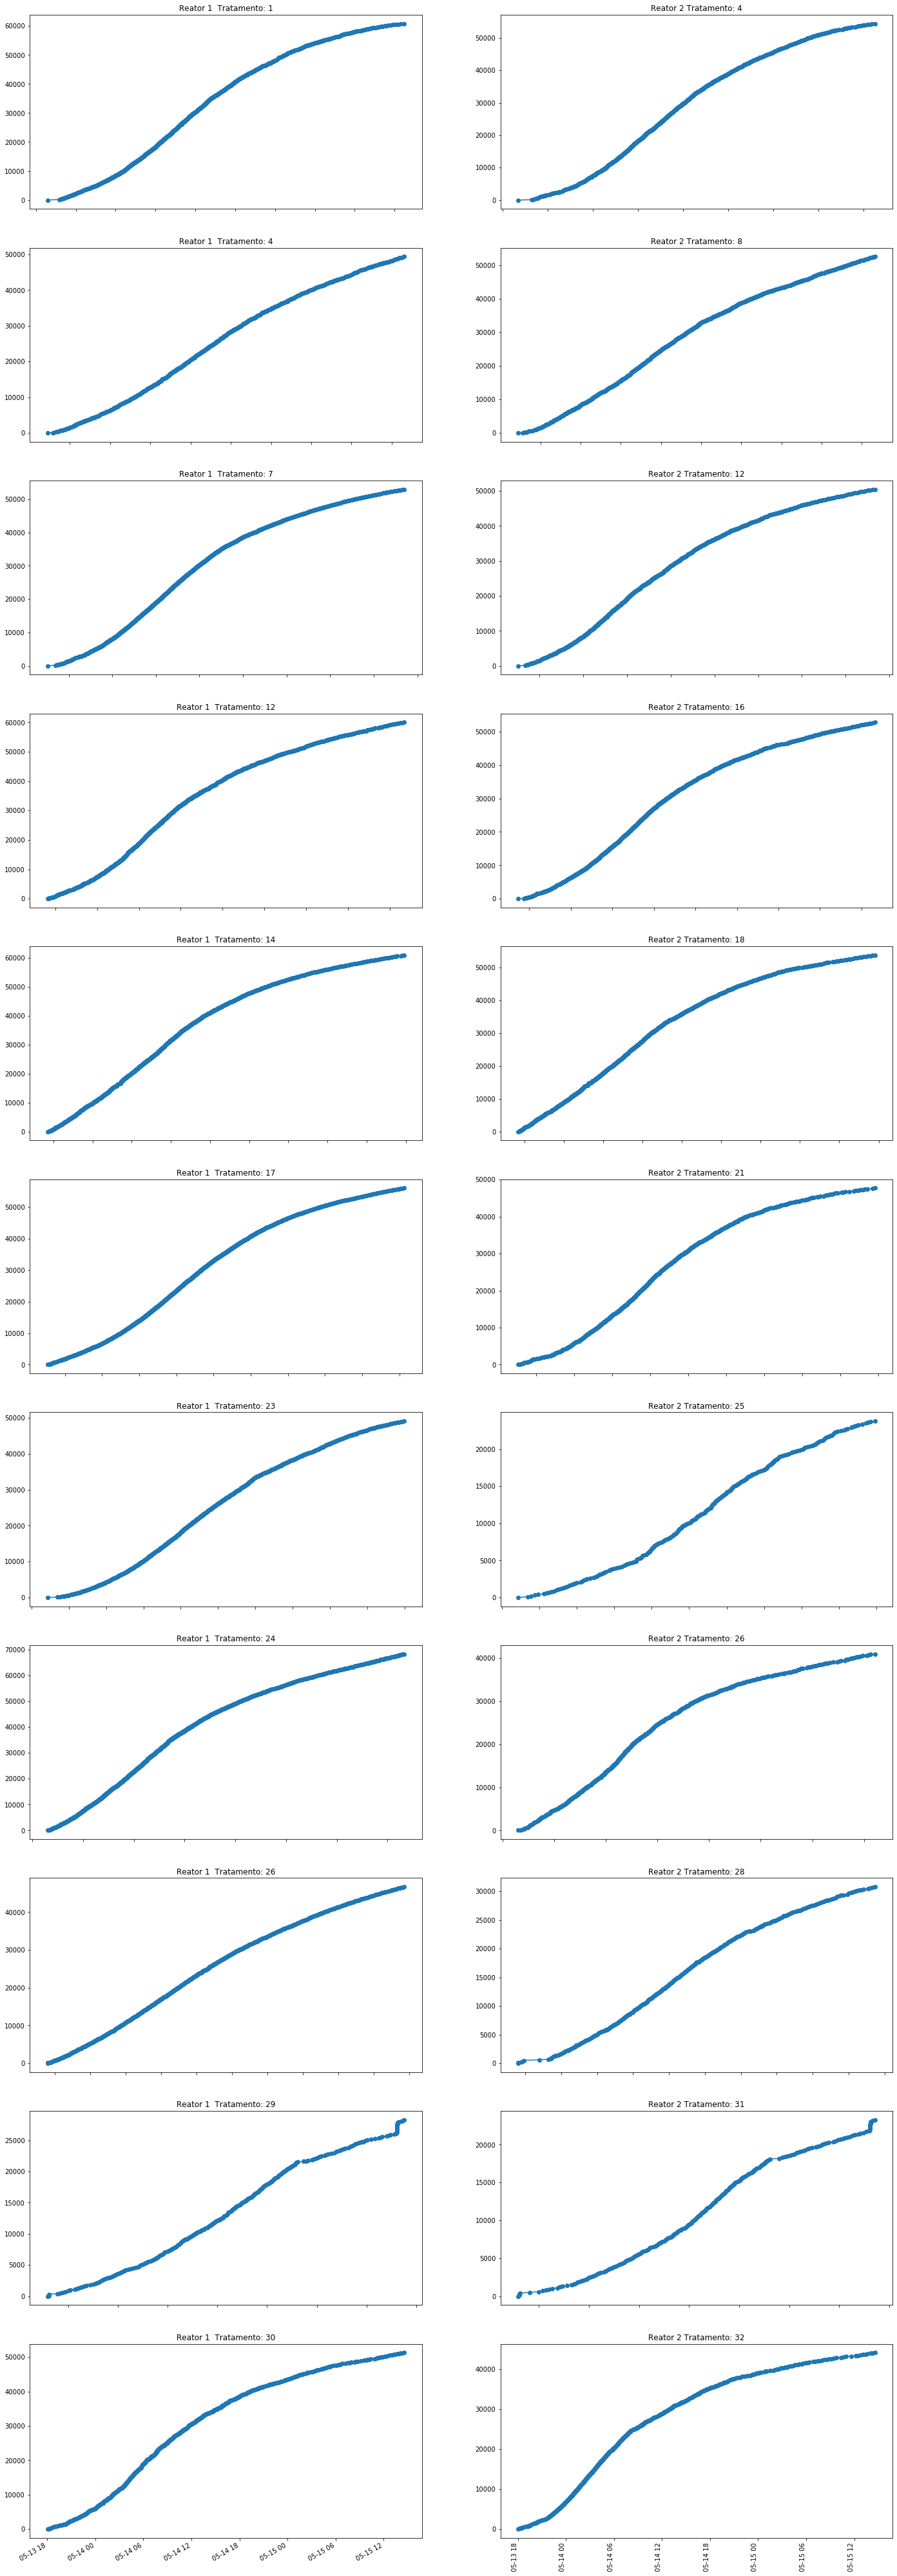

In [17]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14),(ax15, ax16), (ax17, ax18), (ax19, ax20), (ax21, ax22)) = plt.subplots(ncols=2, nrows=11, figsize=(24, 80))

tratamento = tratamento_validos_1[0] 
filter = register_reator_1.tratamento == tratamento
ax1.plot(register_reator_1.data_registro[filter].iloc[:-5], register_reator_1.reator_CO2_1[filter].iloc[:-5], 'o-')
ax1.set_title("Reator 1  Tratamento: "+str(tratamento))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax1.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
fig.autofmt_xdate()

tratamento = tratamento_validos_2[0]
filter = register_reator_2.tratamento == tratamento
ax2.plot(register_reator_2.data_registro[filter].iloc[:-5], register_reator_2.reator_CO2_2[filter].iloc[:-5], 'o-')
ax2.set_title("Reator 2 Tratamento: "+str(tratamento))

tratamento = tratamento_validos_1[1] 
filter = register_reator_1.tratamento == tratamento
ax3.plot(register_reator_1.data_registro[filter].iloc[:-5], register_reator_1.reator_CO2_1[filter].iloc[:-5], 'o-')
ax3.set_title("Reator 1  Tratamento: "+str(tratamento))

tratamento = tratamento_validos_2[1]
filter = register_reator_2.tratamento == tratamento
ax4.plot(register_reator_2.data_registro[filter].iloc[:-5], register_reator_2.reator_CO2_2[filter].iloc[:-5], 'o-')
ax4.set_title("Reator 2 Tratamento: "+str(tratamento))

tratamento = tratamento_validos_1[2] 
filter = register_reator_1.tratamento == tratamento
ax5.plot(register_reator_1.data_registro[filter].iloc[:-5], register_reator_1.reator_CO2_1[filter].iloc[:-5], 'o-')
ax5.set_title("Reator 1  Tratamento: "+str(tratamento))

tratamento = tratamento_validos_2[2]
filter = register_reator_2.tratamento == tratamento
ax6.plot(register_reator_2.data_registro[filter].iloc[:-5], register_reator_2.reator_CO2_2[filter].iloc[:-5], 'o-')
ax6.set_title("Reator 2 Tratamento: "+str(tratamento))

tratamento = tratamento_validos_1[3] 
filter = register_reator_1.tratamento == tratamento
ax7.plot(register_reator_1.data_registro[filter].iloc[:-5], register_reator_1.reator_CO2_1[filter].iloc[:-5], 'o-')
ax7.set_title("Reator 1  Tratamento: "+str(tratamento))

tratamento = tratamento_validos_2[3]
filter = register_reator_2.tratamento == tratamento
ax8.plot(register_reator_2.data_registro[filter].iloc[:-5], register_reator_2.reator_CO2_2[filter].iloc[:-5], 'o-')
ax8.set_title("Reator 2 Tratamento: "+str(tratamento))

tratamento = tratamento_validos_1[4] 
filter = register_reator_1.tratamento == tratamento
ax9.plot(register_reator_1.data_registro[filter].iloc[:-5], register_reator_1.reator_CO2_1[filter].iloc[:-5], 'o-')
ax9.set_title("Reator 1  Tratamento: "+str(tratamento))

tratamento = tratamento_validos_2[4]
filter = register_reator_2.tratamento == tratamento
ax10.plot(register_reator_2.data_registro[filter].iloc[:-5], register_reator_2.reator_CO2_2[filter].iloc[:-5], 'o-')
ax10.set_title("Reator 2 Tratamento: "+str(tratamento))

tratamento = tratamento_validos_1[5] 
filter = register_reator_1.tratamento == tratamento
ax11.plot(register_reator_1.data_registro[filter].iloc[:-5], register_reator_1.reator_CO2_1[filter].iloc[:-5], 'o-')
ax11.set_title("Reator 1  Tratamento: "+str(tratamento))

tratamento = tratamento_validos_2[5]
filter = register_reator_2.tratamento == tratamento
ax12.plot(register_reator_2.data_registro[filter].iloc[:-5], register_reator_2.reator_CO2_2[filter].iloc[:-5], 'o-')
ax12.set_title("Reator 2 Tratamento: "+str(tratamento))

tratamento = tratamento_validos_1[6] 
filter = register_reator_1.tratamento == tratamento
ax13.plot(register_reator_1.data_registro[filter].iloc[:-5], register_reator_1.reator_CO2_1[filter].iloc[:-5], 'o-')
ax13.set_title("Reator 1  Tratamento: "+str(tratamento))

tratamento = tratamento_validos_2[6]
filter = register_reator_2.tratamento == tratamento
ax14.plot(register_reator_2.data_registro[filter].iloc[:-5], register_reator_2.reator_CO2_2[filter].iloc[:-5], 'o-')
ax14.set_title("Reator 2 Tratamento: "+str(tratamento))

tratamento = tratamento_validos_1[7] 
filter = register_reator_1.tratamento == tratamento
ax15.plot(register_reator_1.data_registro[filter].iloc[:-5], register_reator_1.reator_CO2_1[filter].iloc[:-5], 'o-')
ax15.set_title("Reator 1  Tratamento: "+str(tratamento))

tratamento = tratamento_validos_2[7]
filter = register_reator_2.tratamento == tratamento
ax16.plot(register_reator_2.data_registro[filter].iloc[:-5], register_reator_2.reator_CO2_2[filter].iloc[:-5], 'o-')
ax16.set_title("Reator 2 Tratamento: "+str(tratamento))

tratamento = tratamento_validos_1[8] 
filter = register_reator_1.tratamento == tratamento
ax17.plot(register_reator_1.data_registro[filter].iloc[:-5], register_reator_1.reator_CO2_1[filter].iloc[:-5], 'o-')
ax17.set_title("Reator 1  Tratamento: "+str(tratamento))

tratamento = tratamento_validos_2[8]
filter = register_reator_2.tratamento == tratamento
ax18.plot(register_reator_2.data_registro[filter].iloc[:-5], register_reator_2.reator_CO2_2[filter].iloc[:-5], 'o-')
ax18.set_title("Reator 2 Tratamento: "+str(tratamento))

tratamento = tratamento_validos_1[9] 
filter = register_reator_1.tratamento == tratamento
ax19.plot(register_reator_1.data_registro[filter].iloc[:-5], register_reator_1.reator_CO2_1[filter].iloc[:-5], 'o-')
ax19.set_title("Reator 1  Tratamento: "+str(tratamento))

tratamento = tratamento_validos_2[9]
filter = register_reator_2.tratamento == tratamento
ax20.plot(register_reator_2.data_registro[filter].iloc[:-5], register_reator_2.reator_CO2_2[filter].iloc[:-5], 'o-')
ax20.set_title("Reator 2 Tratamento: "+str(tratamento))

tratamento = tratamento_validos_1[10] 
filter = register_reator_1.tratamento == tratamento
ax21.plot(register_reator_1.data_registro[filter].iloc[:-5], register_reator_1.reator_CO2_1[filter].iloc[:-5], 'o-')
ax21.set_title("Reator 1  Tratamento: "+str(tratamento))

tratamento = tratamento_validos_2[10]
filter = register_reator_2.tratamento == tratamento
ax22.plot(register_reator_2.data_registro[filter].iloc[:-5], register_reator_2.reator_CO2_2[filter].iloc[:-5], 'o-')
ax22.set_title("Reator 2 Tratamento: "+str(tratamento))



fig.autofmt_xdate()
fig.show()
_=plt.xticks(rotation=90)


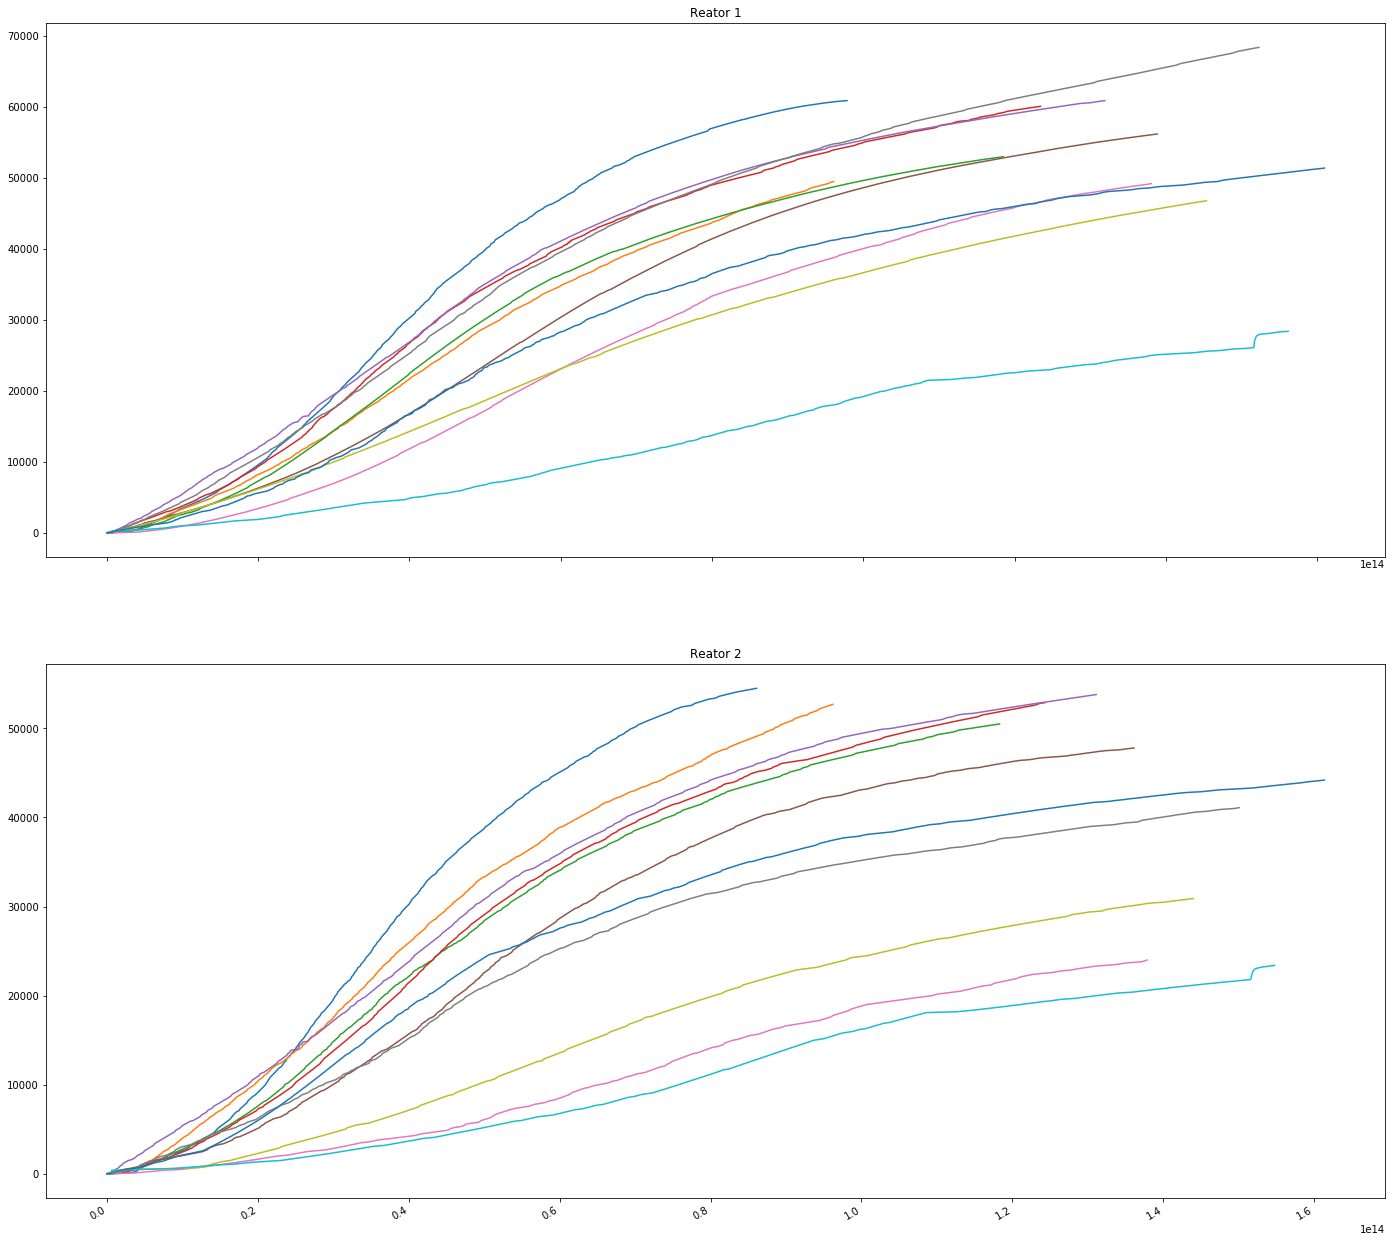

In [18]:
fig, ((ax1),(ax2)) = plt.subplots(ncols=1, nrows=2, figsize=(24, 24))

for tratamento in tratamento_validos_1:
    filter = register_reator_1.tratamento == tratamento
    ax1.plot((register_reator_1.data_registro[filter].iloc[:-4] - register_reator_1.data_registro[filter].iloc[:-4].min()), register_reator_1.reator_CO2_1[filter].iloc[:-4], '-')
ax1.set_title("Reator 1")

for tratamento in tratamento_validos_2:
    filter = register_reator_2.tratamento == tratamento
    ax2.plot((register_reator_2.data_registro[filter].iloc[:-4] - register_reator_2.data_registro[filter].iloc[:-4].min()), register_reator_2.reator_CO2_2[filter].iloc[:-4], '-')
ax2.set_title("Reator 2")

fig.autofmt_xdate()

Legenda Reator 1
Tratamento: 1, Cor: blue, data Inicial: 2019-12-11 15:52:19.729516, final: 2019-12-12 19:03:04.234799
Tratamento: 4, Cor: orange, data Inicial: 2020-01-15 13:20:13.524738, final: 2020-01-16 16:01:32.557737
Tratamento: 7, Cor: green, data Inicial: 2020-01-21 10:03:16.090657, final: 2020-01-22 18:58:26.572354
Tratamento: 12, Cor: red, data Inicial: 2020-02-03 15:15:11.462605, final: 2020-02-05 01:32:33.922253
Legenda Reator 2
Tratamento: 4, Cor: purple, data Inicial: 2019-12-11 16:01:24.924490, final: 2019-12-12 16:59:30.995599
Tratamento: 8, Cor: brown, data Inicial: 2020-01-15 13:20:51.538935, final: 2020-01-16 16:27:22.354151
Tratamento: 12, Cor: pink, data Inicial: 2020-01-21 10:03:17.417436, final: 2020-01-22 19:51:17.074862
Tratamento: 16, Cor: gray, data Inicial: 2020-02-03 14:56:50.441832, final: 2020-02-05 02:16:21.799354


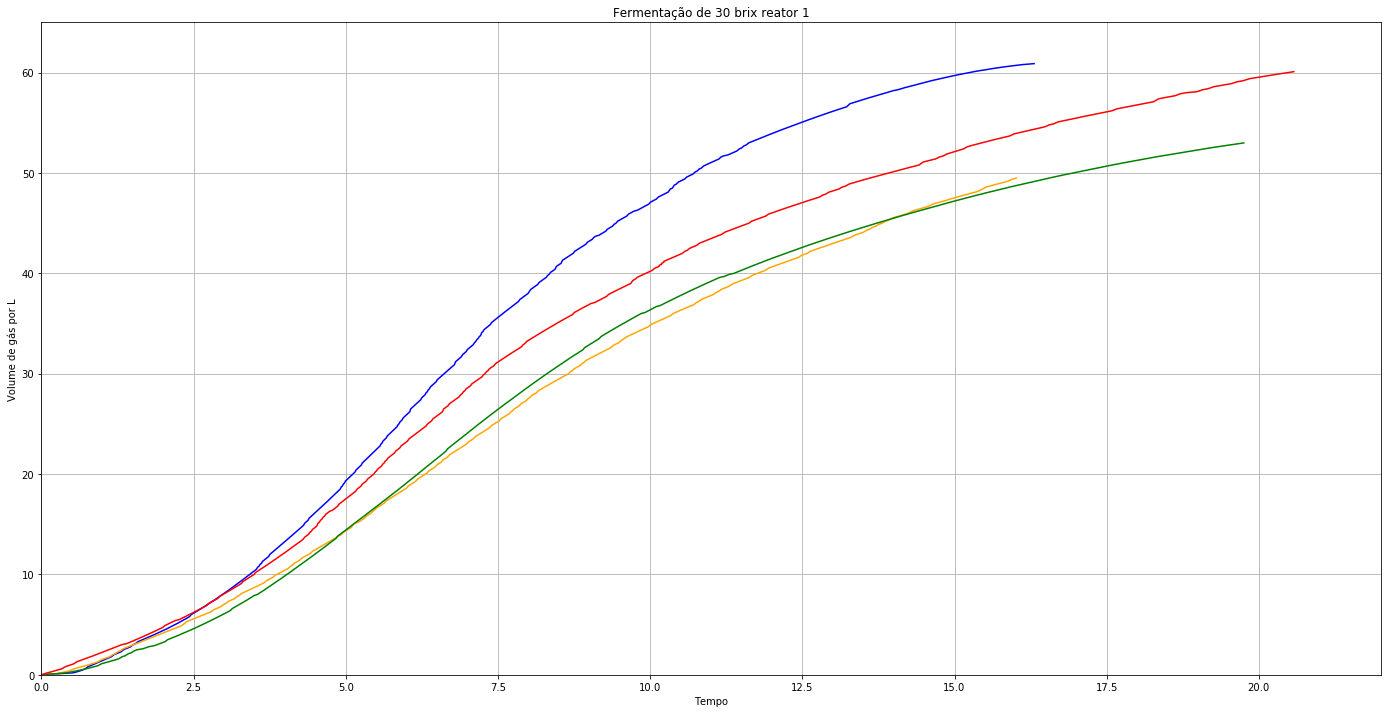

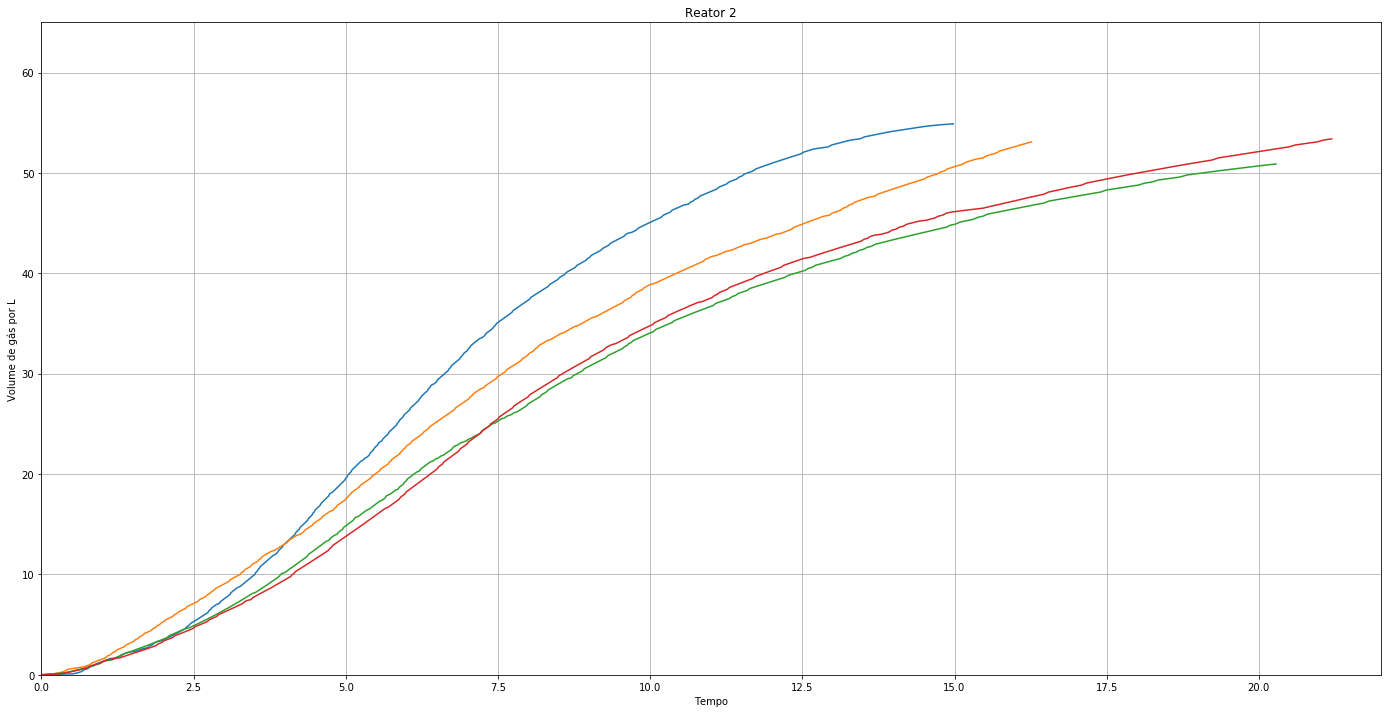

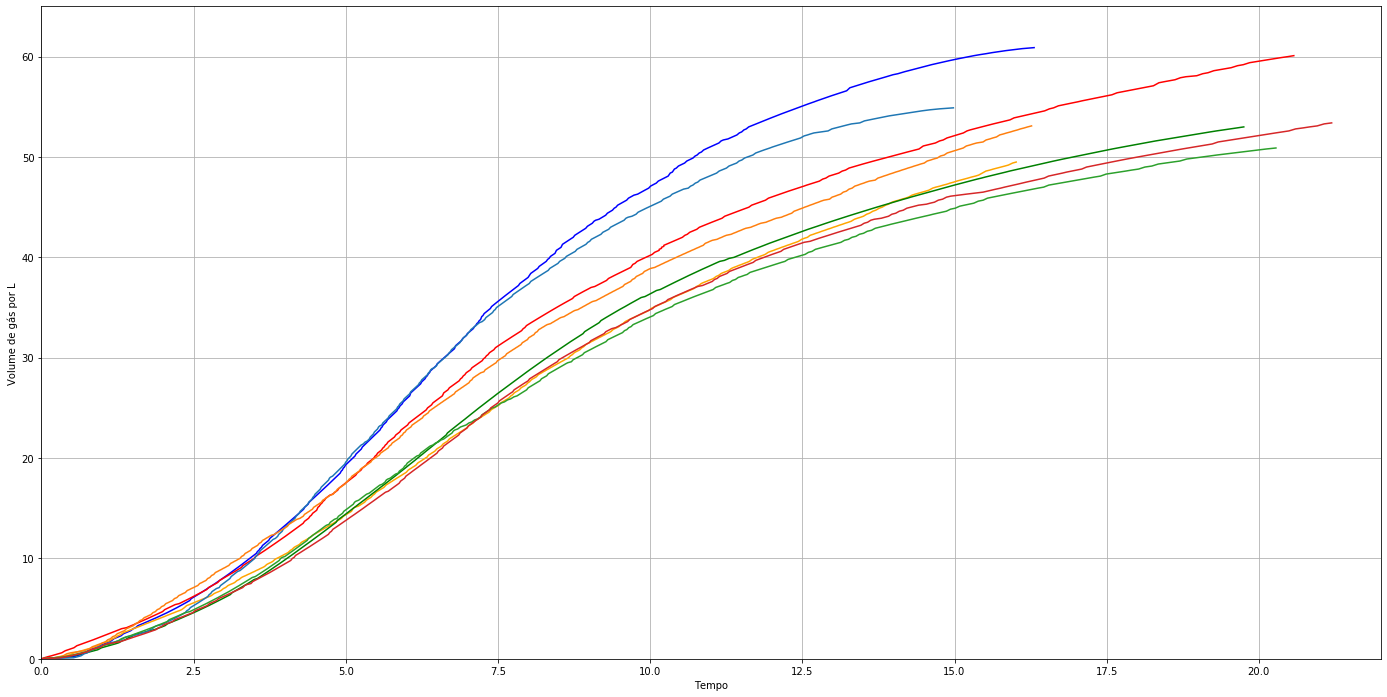

In [92]:
fig1, ax1 = plt.subplots(figsize=(24, 12))
plt.grid(True)
plt.ylabel('Volume de gás por L')
plt.xlabel('Tempo')
plt.xlim(0, 22)
plt.ylim(0, 65)
fig2, ax2 = plt.subplots(figsize=(24, 12))
plt.ylabel('Volume de gás por L')
plt.xlabel('Tempo')
plt.grid(True)
plt.xlim(0, 22)
plt.ylim(0, 65)
fig3, ax3 = plt.subplots(figsize=(24, 12))
plt.ylabel('Volume de gás por L')
plt.xlabel('Tempo')
plt.grid(True)
plt.xlim(0, 22)
plt.ylim(0, 65)

print("Legenda Reator 1")
ax1.set_title("Fermentação de 30 brix reator 1")
for tratamento, cor in [[1, 'blue'],[4,'orange'],[7, 'green'],[12, 'red']]:
    filter = register_reator_1.tratamento == tratamento
    ax1.plot(((register_reator_1.data_registro[filter].iloc[:-4] - register_reator_1.data_registro[filter].iloc[:-4].min()).dt.total_seconds())/6000, (register_reator_1.reator_CO2_1[filter].iloc[:-4])/1000, cor)
    ax3.plot(((register_reator_1.data_registro[filter].iloc[:-4] - register_reator_1.data_registro[filter].iloc[:-4].min()).dt.total_seconds())/6000, (register_reator_1.reator_CO2_1[filter].iloc[:-4])/1000, cor)
    print("Tratamento: " + str(tratamento) + ", Cor: " + cor + ", data Inicial: " + str(register_reator_1.data_registro[filter].iloc[:-4].min()) + ", final: " + str(register_reator_1.data_registro[filter].iloc[:-4].max()))

print("Legenda Reator 2")
ax2.set_title("Reator 2")
for tratamento, cor in [[4, 'purple'],[8,'brown'],[12, 'pink'],[16, 'gray']]:
    filter = register_reator_2.tratamento == tratamento
    ax2.plot(((register_reator_2.data_registro[filter] - register_reator_2.data_registro[filter].min()).dt.total_seconds())/6000, (register_reator_2.reator_CO2_2[filter])/1000, '-')
    ax3.plot(((register_reator_2.data_registro[filter] - register_reator_2.data_registro[filter].min()).dt.total_seconds())/6000, (register_reator_2.reator_CO2_2[filter])/1000, '-')
    print("Tratamento: " + str(tratamento) + ", Cor: " + cor + ", data Inicial: " + str(register_reator_2.data_registro[filter].min()) + ", final: " + str(register_reator_2.data_registro[filter].max()))


Legenda Reator 1
Tratamento: 1, Cor: bo, data Inicial: 2019-12-11 15:52:19.729516, final: 2019-12-12 19:03:04.234799
Tratamento: 4, Cor: yo, data Inicial: 2020-01-15 13:20:13.524738, final: 2020-01-16 16:01:32.557737
Tratamento: 7, Cor: go, data Inicial: 2020-01-21 10:03:16.090657, final: 2020-01-22 18:58:26.572354
Tratamento: 12, Cor: ro, data Inicial: 2020-02-03 15:15:11.462605, final: 2020-02-05 01:32:33.922253
Legenda Reator 2
Tratamento: 4, Cor: bo, data Inicial: 2019-12-11 16:01:24.924490, final: 2019-12-12 16:59:30.995599
Tratamento: 8, Cor: yo, data Inicial: 2020-01-15 13:20:51.538935, final: 2020-01-16 16:27:22.354151
Tratamento: 12, Cor: go, data Inicial: 2020-01-21 10:03:17.417436, final: 2020-01-22 19:51:17.074862
Tratamento: 16, Cor: ro, data Inicial: 2020-02-03 14:56:50.441832, final: 2020-02-05 02:16:21.799354


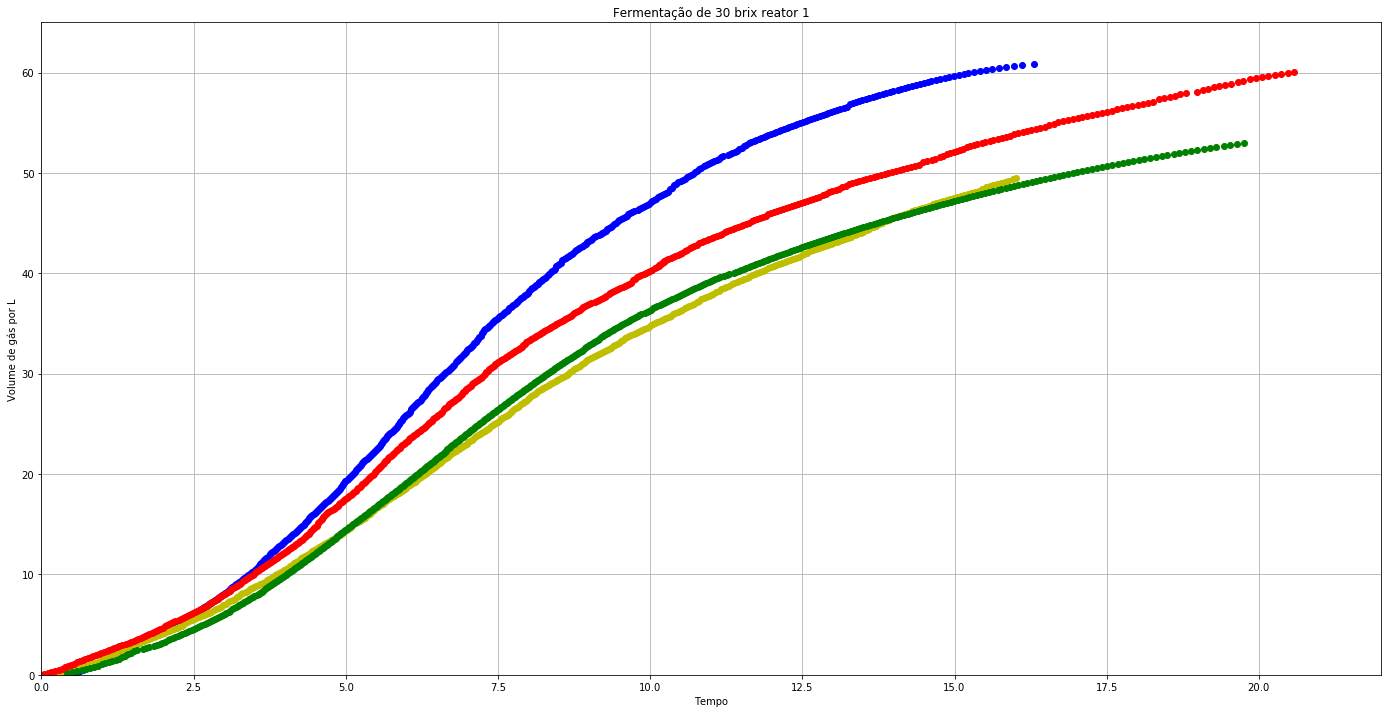

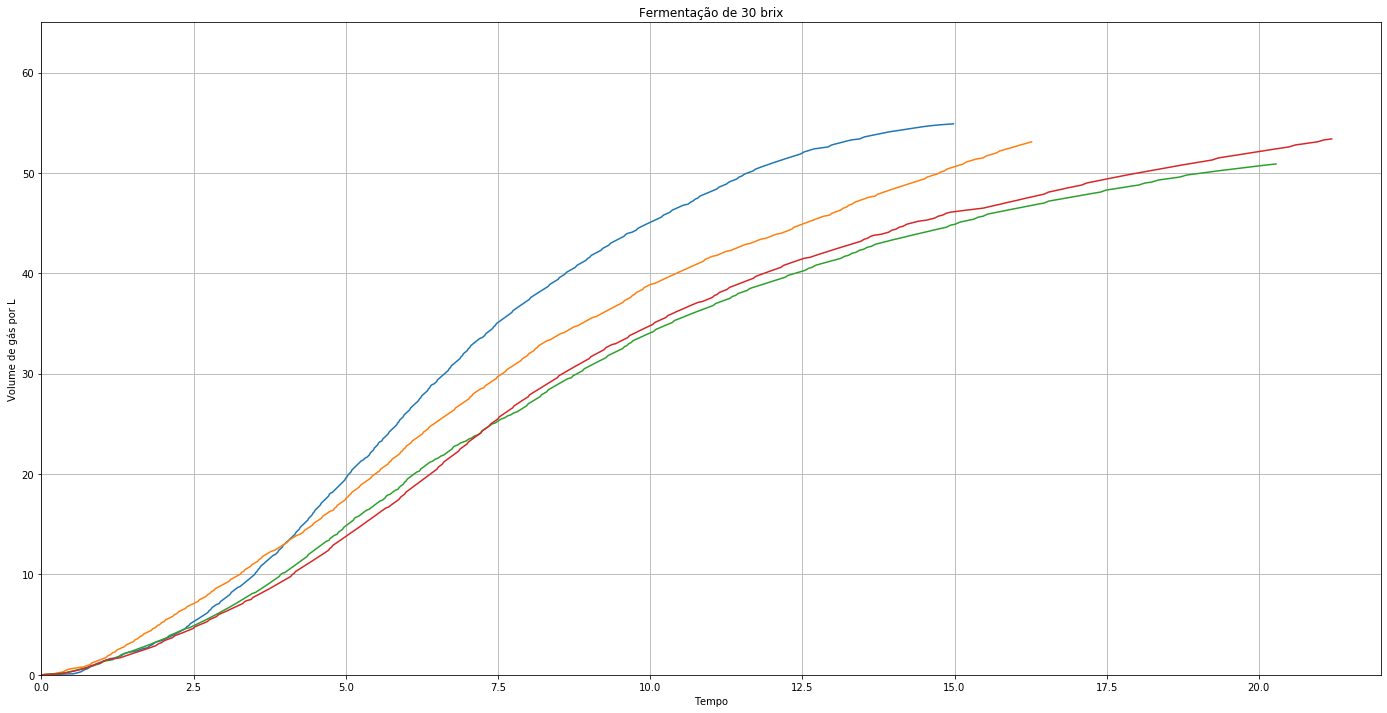

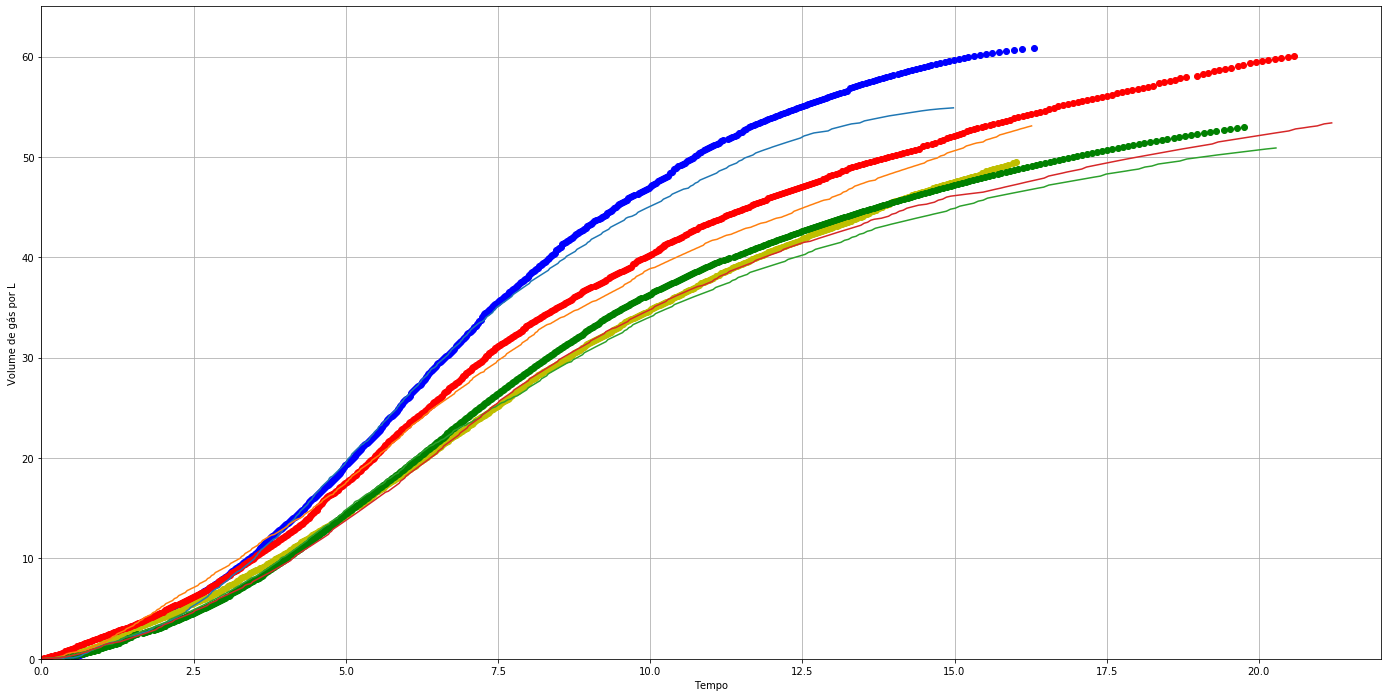

In [114]:
fig1, ax1 = plt.subplots(figsize=(24, 12))
plt.grid(True)
plt.ylabel('Volume de gás por L')
plt.xlabel('Tempo')
plt.xlim(0, 22)
plt.ylim(0, 65)
ax1.set_title("Fermentação de 30 brix reator 1")

fig2, ax2 = plt.subplots(figsize=(24, 12))
plt.ylabel('Volume de gás por L')
plt.xlabel('Tempo')
plt.grid(True)
plt.xlim(0, 22)
plt.ylim(0, 65)
ax2.set_title("Fermentação de 30 brix reator 2")

fig3, ax3 = plt.subplots(figsize=(24, 12))
plt.ylabel('Volume de gás por L')
plt.xlabel('Tempo')
plt.grid(True)
plt.xlim(0, 22)
plt.ylim(0, 65)
ax2.set_title("Fermentação de 30 brix")

print("Legenda Reator 1")

for tratamento, cor in [[1, 'bo'],[4,'yo'],[7, 'go'],[12, 'ro']]:
    filter = register_reator_1.tratamento == tratamento
    ax1.plot(((register_reator_1.data_registro[filter].iloc[:-4] - register_reator_1.data_registro[filter].iloc[:-4].min()).dt.total_seconds())/6000, (register_reator_1.reator_CO2_1[filter].iloc[:-4])/1000, cor)
    ax3.plot(((register_reator_1.data_registro[filter].iloc[:-4] - register_reator_1.data_registro[filter].iloc[:-4].min()).dt.total_seconds())/6000, (register_reator_1.reator_CO2_1[filter].iloc[:-4])/1000, cor)
    print("Tratamento: " + str(tratamento) + ", Cor: " + cor + ", data Inicial: " + str(register_reator_1.data_registro[filter].iloc[:-4].min()) + ", final: " + str(register_reator_1.data_registro[filter].iloc[:-4].max()))

print("Legenda Reator 2")

for tratamento, cor in [[4, 'bo'],[8,'yo'],[12, 'go'],[16, 'ro']]:
    filter = register_reator_2.tratamento == tratamento
    ax2.plot(((register_reator_2.data_registro[filter] - register_reator_2.data_registro[filter].min()).dt.total_seconds())/6000, (register_reator_2.reator_CO2_2[filter])/1000, '-')
    ax3.plot(((register_reator_2.data_registro[filter] - register_reator_2.data_registro[filter].min()).dt.total_seconds())/6000, (register_reator_2.reator_CO2_2[filter])/1000, '-')
    print("Tratamento: " + str(tratamento) + ", Cor: " + cor + ", data Inicial: " + str(register_reator_2.data_registro[filter].min()) + ", final: " + str(register_reator_2.data_registro[filter].max()))


Legenda Reator 1
Tratamento: 14, Cor: bo, data Inicial: 2020-02-05 03:23:30.419809, final: 2020-02-06 16:02:29.547156
Tratamento: 17, Cor: yo, data Inicial: 2020-02-10 18:07:33.271593, final: 2020-02-12 08:41:54.046045
Tratamento: 23, Cor: go, data Inicial: 2020-03-02 09:44:05.809492, final: 2020-03-04 00:05:29.185651
Tratamento: 24, Cor: ro, data Inicial: 2020-03-04 01:48:07.528924, final: 2020-03-05 20:06:26.278319
Legenda Reator 2
Tratamento: 18, Cor: b, data Inicial: 2020-02-05 03:23:31.729325, final: 2020-02-06 16:49:43.135773
Tratamento: 21, Cor: y, data Inicial: 2020-02-10 18:07:34.615302, final: 2020-02-12 09:34:27.012805
Tratamento: 25, Cor: g, data Inicial: 2020-03-02 09:45:01.987376, final: 2020-03-04 01:04:18.729881


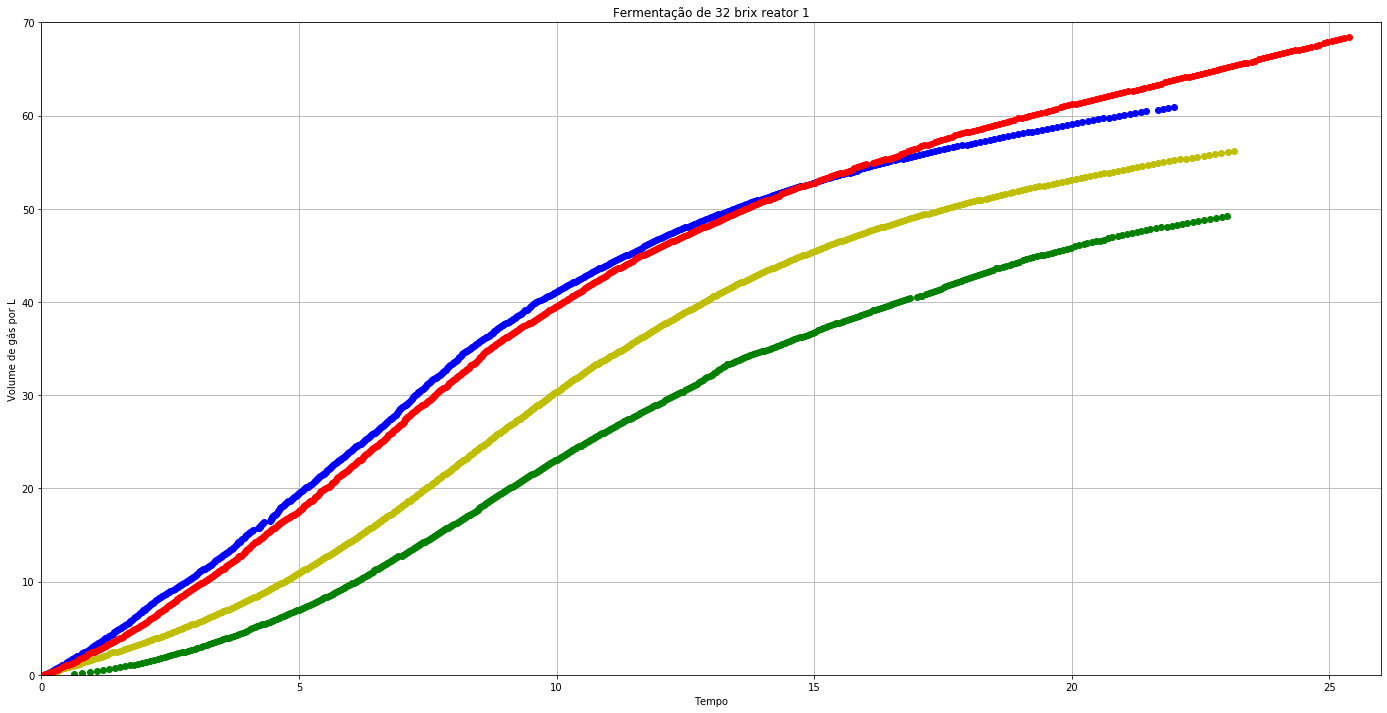

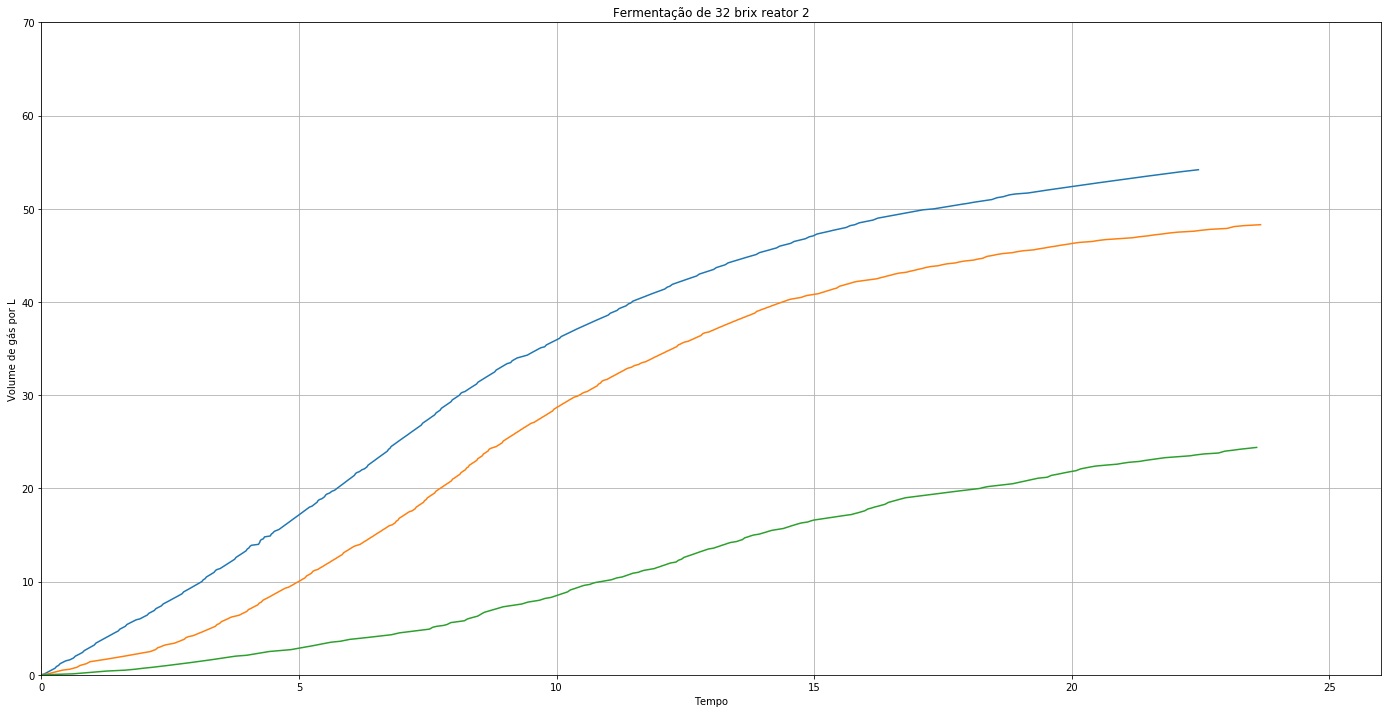

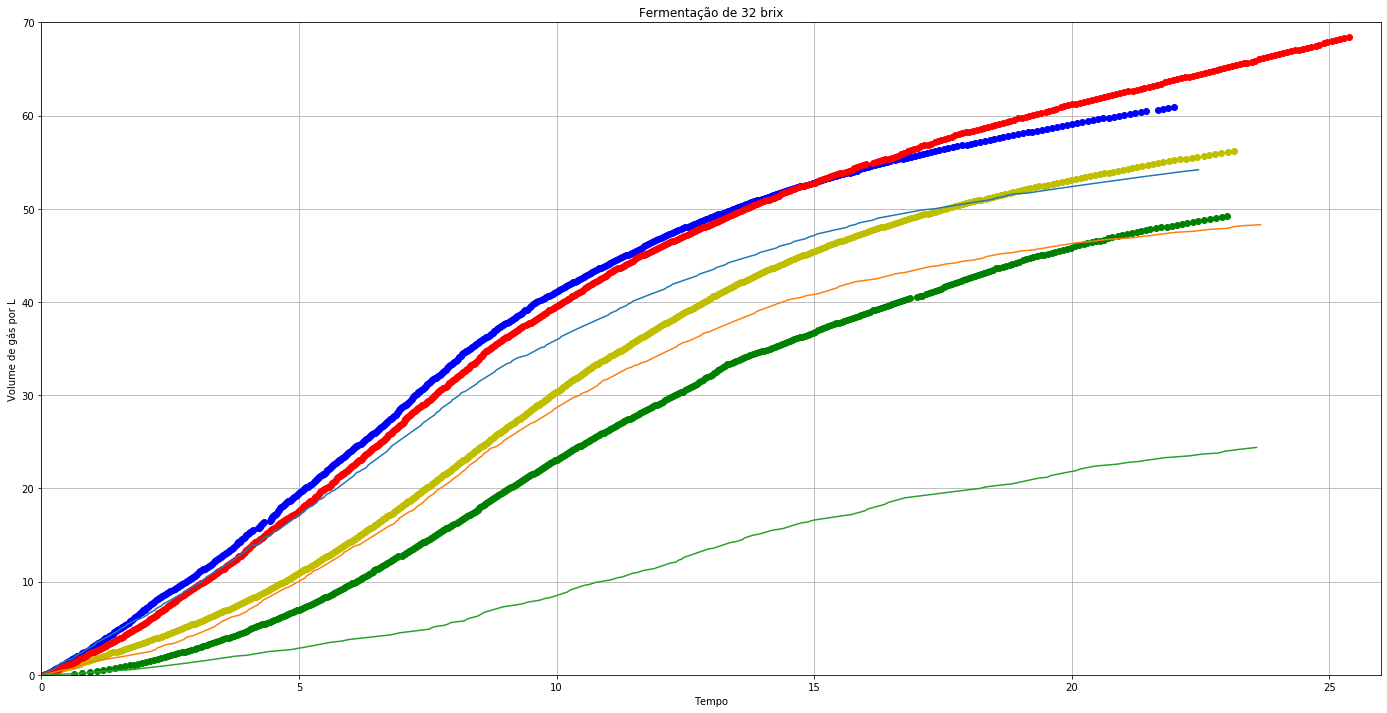

In [110]:
fig1, ax1 = plt.subplots(figsize=(24, 12))
plt.grid(True)
plt.ylabel('Volume de gás por L')
plt.xlabel('Tempo')
plt.xlim(0, 26)
plt.ylim(0, 70)
ax1.set_title("Fermentação de 32 brix reator 1")

fig2, ax2 = plt.subplots(figsize=(24, 12))
plt.ylabel('Volume de gás por L')
plt.xlabel('Tempo')
plt.grid(True)
plt.xlim(0, 26)
plt.ylim(0, 70)
ax2.set_title("Fermentação de 32 brix reator 2")

fig3, ax3 = plt.subplots(figsize=(24, 12))
plt.ylabel('Volume de gás por L')
plt.xlabel('Tempo')
plt.grid(True)
plt.xlim(0, 26)
plt.ylim(0, 70)
ax3.set_title("Fermentação de 32 brix")

print("Legenda Reator 1")

for tratamento, cor in [[14, 'bo'],[17,'yo'],[23, 'go'],[24, 'ro']]:
    filter = register_reator_1.tratamento == tratamento
    ax1.plot(((register_reator_1.data_registro[filter].iloc[:-4] - register_reator_1.data_registro[filter].iloc[:-4].min()).dt.total_seconds())/6000, (register_reator_1.reator_CO2_1[filter].iloc[:-4])/1000, cor)
    ax3.plot(((register_reator_1.data_registro[filter].iloc[:-4] - register_reator_1.data_registro[filter].iloc[:-4].min()).dt.total_seconds())/6000, (register_reator_1.reator_CO2_1[filter].iloc[:-4])/1000, cor)
    print("Tratamento: " + str(tratamento) + ", Cor: " + cor + ", data Inicial: " + str(register_reator_1.data_registro[filter].iloc[:-4].min()) + ", final: " + str(register_reator_1.data_registro[filter].iloc[:-4].max()))

print("Legenda Reator 2")

for tratamento, cor in [[18, 'b'],[21,'y'],[25, 'g']]:
    filter = register_reator_2.tratamento == tratamento
    ax2.plot(((register_reator_2.data_registro[filter] - register_reator_2.data_registro[filter].min()).dt.total_seconds())/6000, (register_reator_2.reator_CO2_2[filter])/1000, '-')
    ax3.plot(((register_reator_2.data_registro[filter] - register_reator_2.data_registro[filter].min()).dt.total_seconds())/6000, (register_reator_2.reator_CO2_2[filter])/1000, '-')
    print("Tratamento: " + str(tratamento) + ", Cor: " + cor + ", data Inicial: " + str(register_reator_2.data_registro[filter].min()) + ", final: " + str(register_reator_2.data_registro[filter].max()))


Legenda Reator 1
Tratamento: 26, Cor: bo, data Inicial: 2020-03-17 11:12:33.937252, final: 2020-03-19 03:35:25.480966
Tratamento: 29, Cor: go, data Inicial: 2020-05-05 15:30:46.560839, final: 2020-05-07 10:53:46.362785
Legenda Reator 2
Tratamento: 26, Cor: y, data Inicial: 2020-03-04 01:48:08.809829, final: 2020-03-05 20:32:41.041332
Tratamento: 28, Cor: b, data Inicial: 2020-03-17 11:12:35.264141, final: 2020-03-19 04:17:00.800077
Tratamento: 31, Cor: g, data Inicial: 2020-05-05 15:30:46.560839, final: 2020-05-07 11:33:53.716633


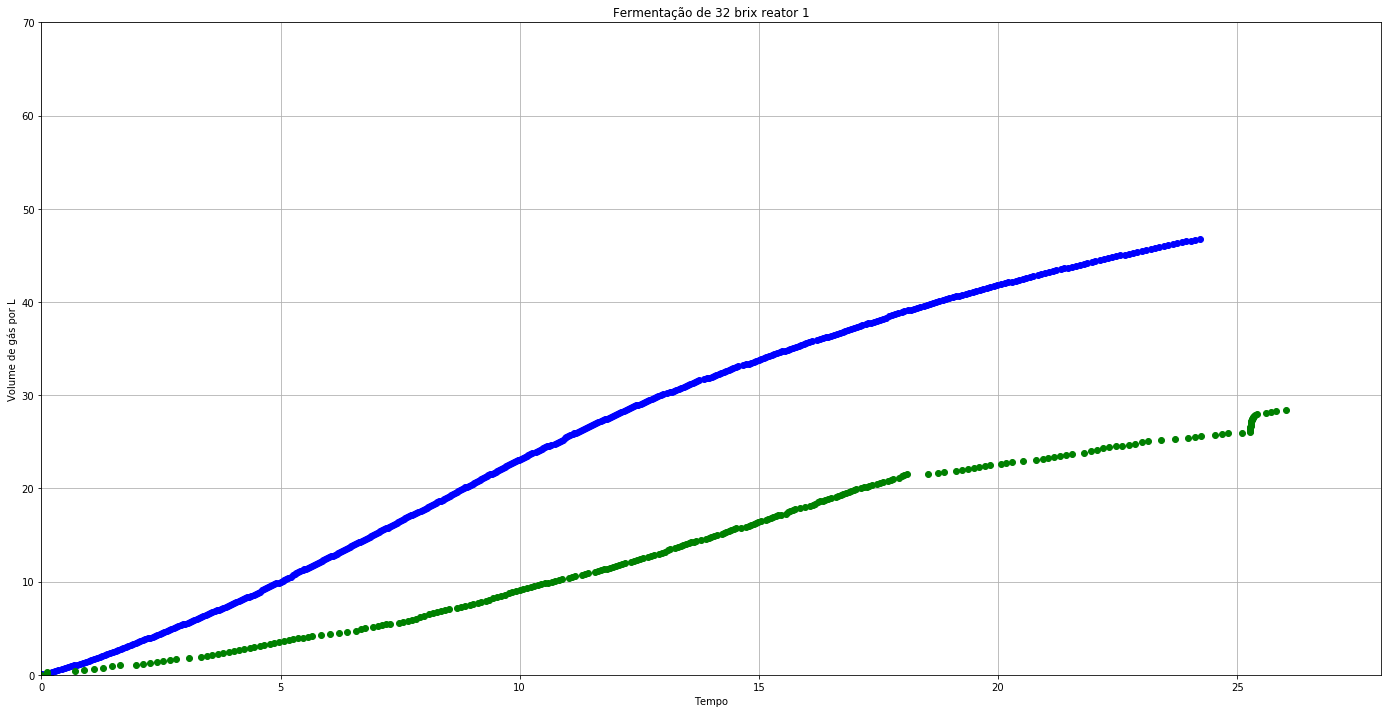

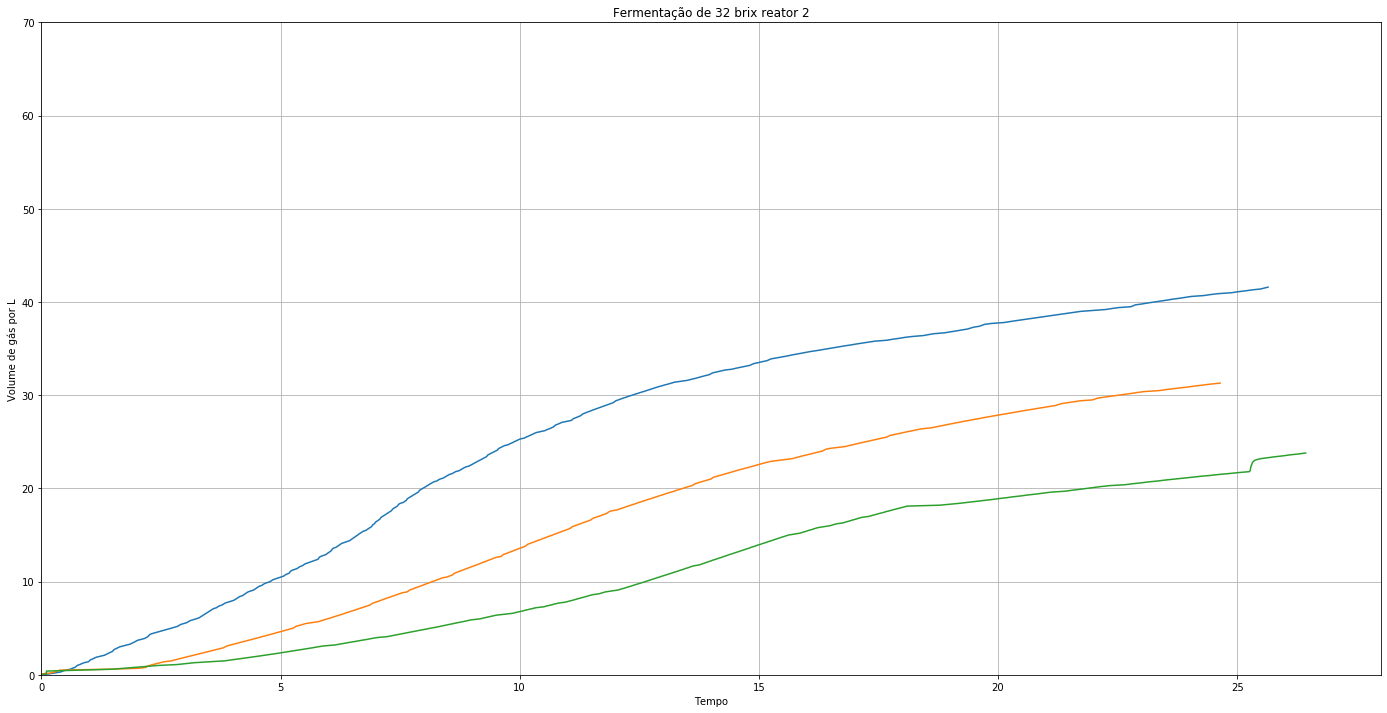

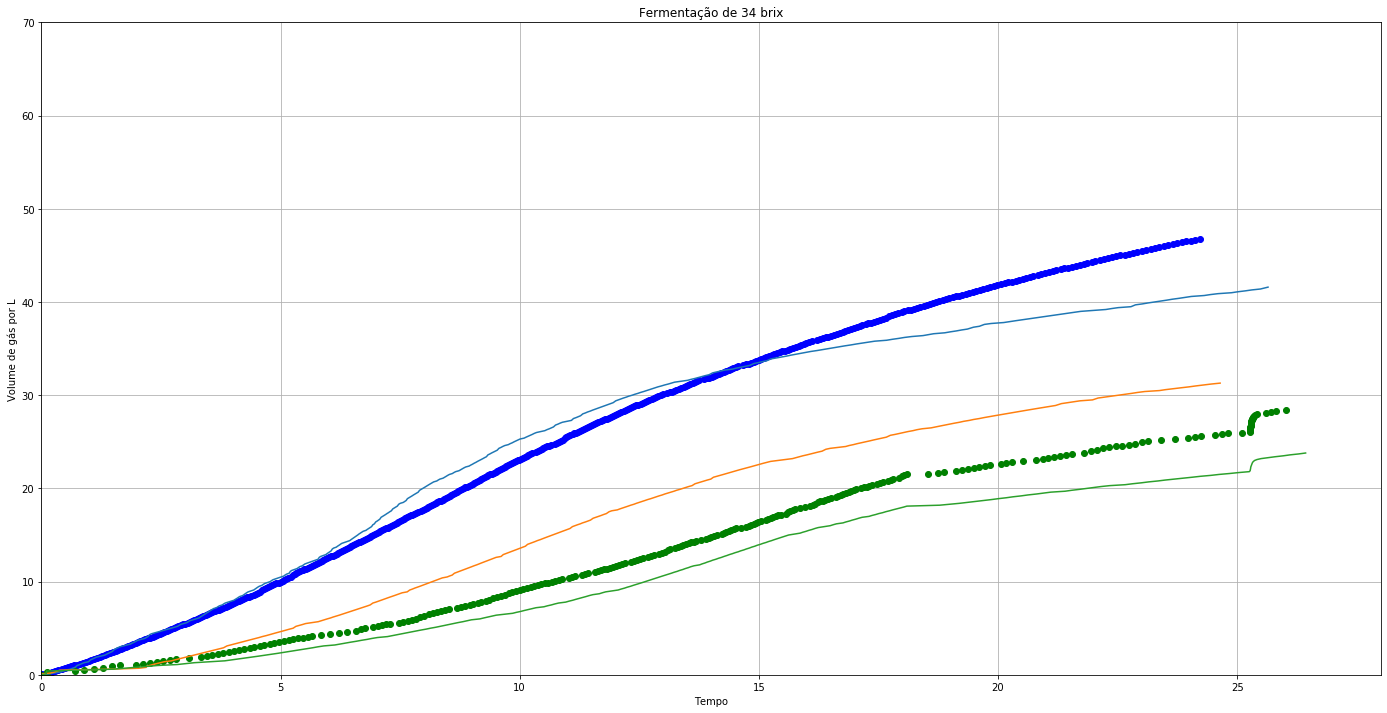

In [113]:
fig1, ax1 = plt.subplots(figsize=(24, 12))
plt.grid(True)
plt.ylabel('Volume de gás por L')
plt.xlabel('Tempo')
plt.xlim(0, 28)
plt.ylim(0, 70)
ax1.set_title("Fermentação de 32 brix reator 1")

fig2, ax2 = plt.subplots(figsize=(24, 12))
plt.ylabel('Volume de gás por L')
plt.xlabel('Tempo')
plt.grid(True)
plt.xlim(0, 28)
plt.ylim(0, 70)
ax2.set_title("Fermentação de 32 brix reator 2")

fig3, ax3 = plt.subplots(figsize=(24, 12))
plt.ylabel('Volume de gás por L')
plt.xlabel('Tempo')
plt.grid(True)
plt.xlim(0, 28)
plt.ylim(0, 70)
ax3.set_title("Fermentação de 34 brix")

print("Legenda Reator 1")

for tratamento, cor in [[26, 'bo'],[29,'go']]:
    filter = register_reator_1.tratamento == tratamento
    ax1.plot(((register_reator_1.data_registro[filter].iloc[:-4] - register_reator_1.data_registro[filter].iloc[:-4].min()).dt.total_seconds())/6000, (register_reator_1.reator_CO2_1[filter].iloc[:-4])/1000, cor)
    ax3.plot(((register_reator_1.data_registro[filter].iloc[:-4] - register_reator_1.data_registro[filter].iloc[:-4].min()).dt.total_seconds())/6000, (register_reator_1.reator_CO2_1[filter].iloc[:-4])/1000, cor)
    print("Tratamento: " + str(tratamento) + ", Cor: " + cor + ", data Inicial: " + str(register_reator_1.data_registro[filter].iloc[:-4].min()) + ", final: " + str(register_reator_1.data_registro[filter].iloc[:-4].max()))

print("Legenda Reator 2")

for tratamento, cor in [[26, 'y'],[28,'b'],[31, 'g']]:
    filter = register_reator_2.tratamento == tratamento
    ax2.plot(((register_reator_2.data_registro[filter] - register_reator_2.data_registro[filter].min()).dt.total_seconds())/6000, (register_reator_2.reator_CO2_2[filter])/1000, '-')
    ax3.plot(((register_reator_2.data_registro[filter] - register_reator_2.data_registro[filter].min()).dt.total_seconds())/6000, (register_reator_2.reator_CO2_2[filter])/1000, '-')
    print("Tratamento: " + str(tratamento) + ", Cor: " + cor + ", data Inicial: " + str(register_reator_2.data_registro[filter].min()) + ", final: " + str(register_reator_2.data_registro[filter].max()))


In [123]:
filter = register_reator_2.tratamento == 32
register_reator_2.data_registro[filter].head()
register_reator_2.data_registro[filter].count()
    

436

In [128]:
register_reator_1.tratamento.value_counts()

24.0    630
14.0    569
17.0    562
1.0     538
12.0    532
7.0     524
23.0    475
26.0    468
30.0    462
4.0     430
29.0    270
Name: tratamento, dtype: int64